## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2020, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

We use the 2019 version for this homework. You can find the database in SQLite format in the hw5 folder on Piazza.

Documentation for the database, including a description of all tables, is in the `readme2019.txt` file included in the hw5 folder.

__Exercises:__

1. (3 points) From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. (3 points) Is there any general trend in payrolls over this time period? (Hint: make a plot to find the trend)

3. (2 points) There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. (2 points) How do the top 5 teams compare to other teams?

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql

1.(3 points) From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

In [7]:
#import data
data = sql.connect("lahmansbaseballdb.sqlite")
data

In [85]:
# show SQLite databases 
cur = data.execute("SELECT * FROM sqlite_master")
# cur.fetchall()

Following is the information for salaries table.

('table',
  'salaries',
  'salaries',
  15209,
  'CREATE TABLE "salaries" (\n\t"ID" INTEGER NOT NULL,\n\t"yearID" SMALLINT NOT NULL,\n\t"teamID" CHARACTER(3) NOT NULL,\n\t"team_ID" INTEGER NULL,\n\t"lgID" CHARACTER(2) NOT NULL,\n\t"playerID" VARCHAR(9) NOT NULL,\n\t"salary" DOUBLE NULL,\n\tPRIMARY KEY ("ID"),\n\tFOREIGN KEY("lgID") REFERENCES "leagues" ("lgID") ON UPDATE NO ACTION ON DELETE NO ACTION,\n\tFOREIGN KEY("team_ID") REFERENCES "teams" ("ID") ON UPDATE NO ACTION ON DELETE NO ACTION,\n\tFOREIGN KEY("playerID") REFERENCES "people" ("playerID") ON UPDATE NO ACTION ON DELETE NO ACTION\n)'),
 ('index',
  'salaries_lgID',
  'salaries',
  15210,
  'CREATE INDEX "salaries_lgID" ON "salaries" ("lgID")'),
 ('index',
  'salaries_playerID',
  'salaries',
  15211,
  'CREATE INDEX "salaries_playerID" ON "salaries" ("playerID")'),
 ('index',
  'salaries_team_ID',
  'salaries',
  15212,
  'CREATE INDEX "salaries_team_ID" ON "salaries" ("team_ID")'),
 ('index',
  'salaries_yearID',
  'salaries',
  15213,
  'CREATE UNIQUE INDEX "salaries_yearID" ON "salaries" ("yearID", "teamID", "lgID", "playerID")')

In [11]:
# have a look at data from salaries table
pd.read_sql("SELECT * FROM salaries", data)

,ID,yearID,teamID,team_ID,lgID,playerID,salary
0,1,1985,ATL,1918,NL,barkele01,870000.0
1,2,1985,ATL,1918,NL,bedrost01,550000.0
2,3,1985,ATL,1918,NL,benedbr01,545000.0
3,4,1985,ATL,1918,NL,campri01,633333.0
4,5,1985,ATL,1918,NL,ceronri01,625000.0
...,...,...,...,...,...,...,...
26423,26424,2016,WAS,2835,NL,strasst01,10400000.0
26424,26425,2016,WAS,2835,NL,taylomi02,524000.0
26425,26426,2016,WAS,2835,NL,treinbl01,524900.0
26426,26427,2016,WAS,2835,NL,werthja01,21733615.0


In [57]:
# STEP 1: Get the salaries and tean ID from salaries table
# STEP 2: Limit the year range (2006-2016)
# STEP 3: Group the data by teamID
# STEP 4: Sort the data by the sum of salaries
# STEP 5: show the top 5

pd.read_sql("""
    SELECT SUM(salary), teamID FROM salaries  
    WHERE yearID BETWEEN '2006' AND '2017' 
    GROUP BY teamID
    ORDER BY SUM(salary) DESC
    LIMIT 5;""", data)

,SUM(salary),teamID
0,2.263671e+09,NYA
1,1.675458e+09,BOS
2,1.598053e+09,LAN
3,1.457055e+09,DET
4,1.399510e+09,PHI


NYA, BOS, LAN, DET, PHI had the highest payrolls (sum of the salary from 2006 to 2016).

In [62]:
# STEP 1: Get the salaries and tean ID from salaries table
# STEP 2: Limit the year range (2006-2016)
# STEP 3: Group the data by teamID
# STEP 4: Sort the data by the sum of salaries
# STEP 5: show the top 5

pd.read_sql("""
    SELECT SUM(salary), teamID, yearID FROM salaries  
    WHERE yearID BETWEEN '2006' AND '2017' 
    GROUP BY teamID, yearID
    ORDER BY SUM(salary) DESC
    LIMIT 5;""", data)

,SUM(salary),teamID,yearID
0,231978886.0,NYA,2013
1,223362196.0,LAN,2013
2,222997792.0,NYA,2016
3,221288380.0,LAN,2016
4,217014600.0,LAN,2014


If the payroll is for single year, the highest five payrolls are NYA at 2013, LAN at 2013, NYA at 2016, LAN at 2016 and LAN at 2014. 

2. (3 points) Is there any general trend in payrolls over this time period? (Hint: make a plot to find the trend)

In [80]:
sql = pd.read_sql("""
                  SELECT SUM(salary), yearID, teamID FROM salaries 
                  WHERE yearID BETWEEN '2006' AND '2017' 
                  GROUP BY teamID, yearID""", data)

In [81]:
sql

,SUM(salary),yearID,teamID
0,59684226.0,2006,ARI
1,90156876.0,2006,ATL
2,72585582.0,2006,BAL
3,120099824.0,2006,BOS
4,102750667.0,2006,CHA
...,...,...,...
325,143053500.0,2016,SLN
326,57097310.0,2016,TBA
327,176038723.0,2016,TEX
328,138701700.0,2016,TOR


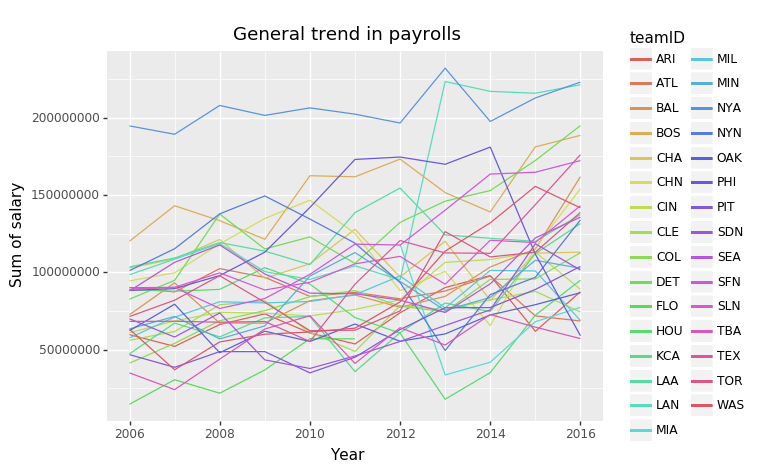

<ggplot: (296752841)>

In [82]:
from plotnine import *
(
    ggplot(sql, aes(x = "yearID", y = "SUM(salary)", color = "teamID")) + geom_line()
    + labs(title = "General trend in payrolls", y = "Sum of salary", x = "Year")
)


The general trend in payroll is slightly increasing from 2006 to 2016 for most of teams.

3. (2 points) There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

For many teams in top five, such as NYA and BOS, payroll has a decrease in 2008 due to financial crisis. Ticker price was reduced because  many people cannot get paid and the middle tier of free agents could be severely affected by the credit crisis.
https://bleacherreport.com/articles/82885-how-mlb-will-be-affected-by-the-economic-crisis

In 2004, NYA payroll had a decrease. To order to avoid luxury tax rate increasing, the payroll was cut by about $20 million, down to the critical threshold of $189 million.
https://www.nytimes.com/2012/03/02/sports/baseball/yankees-want-to-cut-payroll-to-189-million-by-2014.html

4. (2 points) How do the top 5 teams compare to other teams?

The demand for baseball extends beyond the attendance at live games to television, radio and print. Historical policy and rule influenced the payroll in all teams at a samw way. Most of them have same trend. The only difference is that the top five payroll teams are more robust than other teams. They can be less influenced by environment and rules because the league has more fans and more stable income. 